<a href="https://colab.research.google.com/github/avinashganguri/smart-home/blob/main/Smart_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Auth google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the dataset
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/readings.csv",low_memory=False)

#delete last row (NaNs)
data = data[:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [4]:
data.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [5]:
data['time'] = pd.to_datetime(data['time'], unit='s')

In [6]:
data['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(data),  freq='min'))

In [7]:
data = data.set_index('time')

In [8]:
data.head()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [9]:
data['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [10]:
data['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', '0.41', '0.78', '0.2', '0.77', '0.46', '0.55', '0.01',
       '0.51', '0.47', '0.5', '0.4', '0.3', '0.43', '0.33', '0.6', '0.68',
       '0.66', '0.45', '0.34', '0.52', '0.67', '0.49', '0.37', '0.36',
       '0.61', '0.38', '0.42', '0.53', '0.63', '0.32', '0.56', '0.58',
       '0.72', '0.73', '0.71', '0.64', '0.59'], dtype=object)

In [11]:
# deleting KW in column name
data.columns = [i.replace(' [kW]', '') for i in data.columns]

In [12]:
# sum similar consumtions and delete summary column
data['Furnace'] = data[['Furnace 1','Furnace 2']].sum(axis=1)
data['Kitchen'] = data[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1) #We could also use the mean
data.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)

In [13]:
# using backfill method to replace invalid values in cloudCover column
data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

In [14]:
data = data[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn',
             'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility',
             'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
             'dewPoint', 'precipProbability']]

In [15]:
data.head()

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.175417,0.000650,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.300917,0.000783,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0


Text(0.5, 1.0, 'Energy correlation Heatmap')

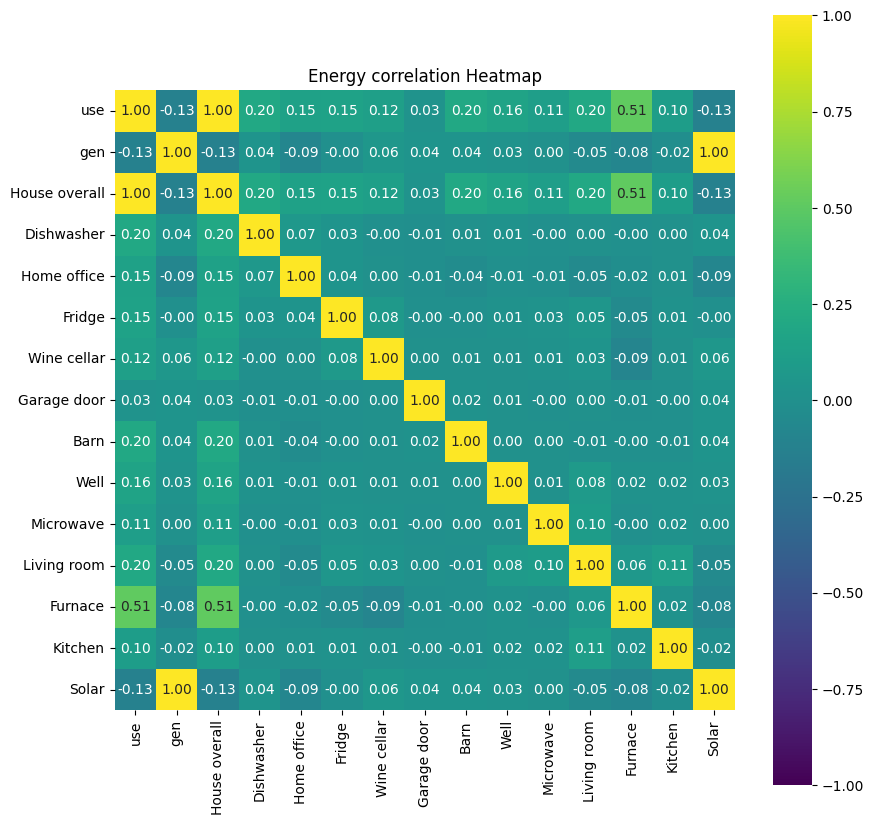

In [16]:
# Plotting heatmap of first 15 columns for energy correlations
fig, ax = plt.subplots(figsize=(10, 10))
corr_matrix = data[data.columns[0:15]].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0, cmap='viridis', square=True, ax=ax)
ax.set_title('Energy correlation Heatmap')

After seeing the above correlations, we observe for columns **use** and **House overall** has high correleations; Similarily, **gen** and **solar** has high correlation

In [17]:
# veriy if the correlated colums have same data
print(data['use'].equals(data['House overall']))
print(data['gen'].equals(data['Solar']))

True
True


<Axes: xlabel='time'>

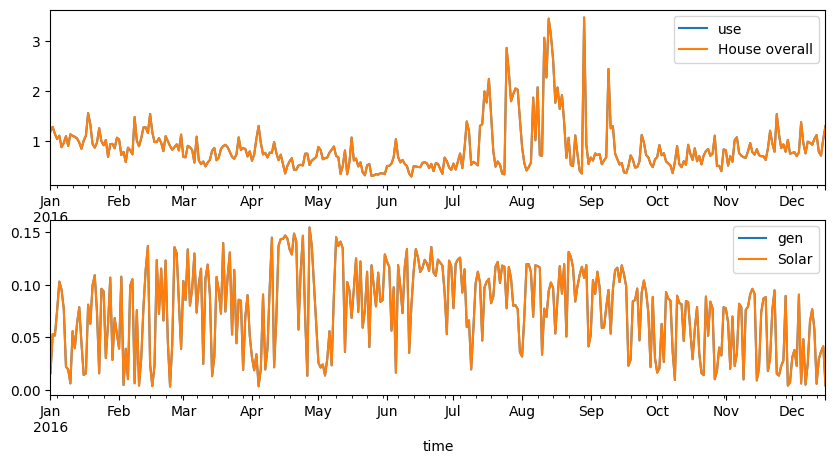

In [18]:
daily_mean_use = data[['use', 'House overall']].resample('D').mean()
daily_mean_gen = data[['gen', 'Solar']].resample('D').mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
daily_mean_use.plot(ax=axes[0])
daily_mean_gen.plot(ax=axes[1])

In [19]:
data.drop(['use', 'gen'], axis=1, inplace=True)

Text(0.5, 1.0, 'Weather correlation Heatmap')

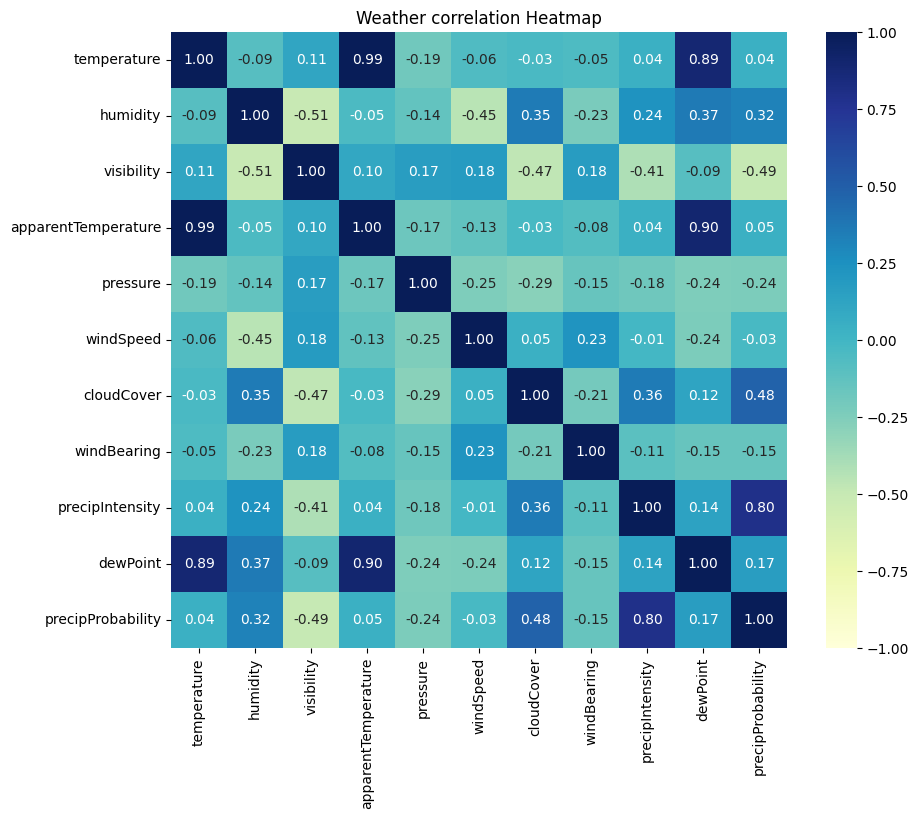

In [20]:
# Plotting heatmap for weather correlations
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = data[data.columns[13:]].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0, cmap='YlGnBu', square=True, ax=ax)
ax.set_title('Weather correlation Heatmap')

From the above correlation plot, we observe columns temperature and apparentTemperature suspiciously has high correlation and need to visualize the distribution side by side; dewPoint and temperature also seems to have high correlation;

<Axes: xlabel='time'>

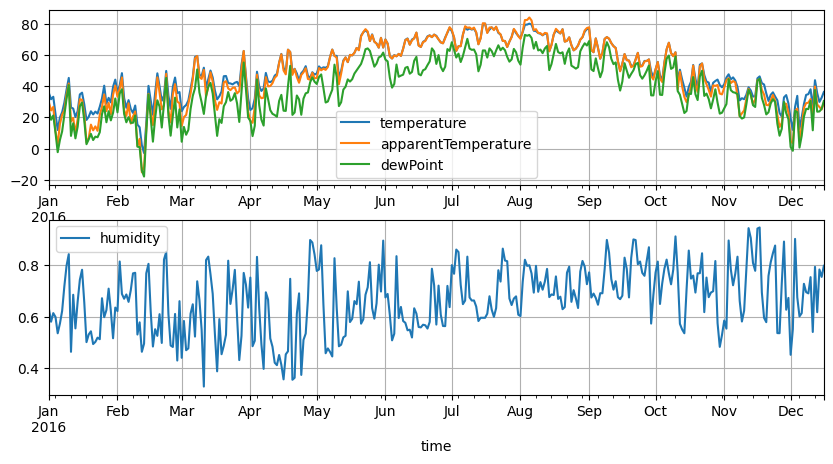

In [21]:
daily_mean_1 = data[['temperature','apparentTemperature', 'dewPoint']].resample('D').mean()
daily_mean_2 = data[['humidity']].resample('D').mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
daily_mean_1.plot(ax=axes[0], grid=True)
daily_mean_2.plot(ax=axes[1], grid=True)

In [22]:
# see correlations between diff temp (apparentTemperature, temperature) and other weather columns
data['Tdiff'] = (data['apparentTemperature']-data['temperature'])
climate = data.columns[13:-1].tolist()
lista_corr = []
for i in climate:
  cor = data[i].corr(data['Tdiff'])
  lista_corr.append(cor)
data_corr = pd.DataFrame(list(zip(climate, lista_corr)), columns=['weather','Tdiff_correlations']).set_index('weather')
data_corr

,Tdiff_correlations
weather,
temperature,0.732693
humidity,0.188441
visibility,-0.018984
apparentTemperature,0.807018
pressure,-0.029497
windSpeed,-0.465971
cloudCover,-0.013172
windBearing,-0.180131
precipIntensity,0.055953


<Axes: xlabel='time'>

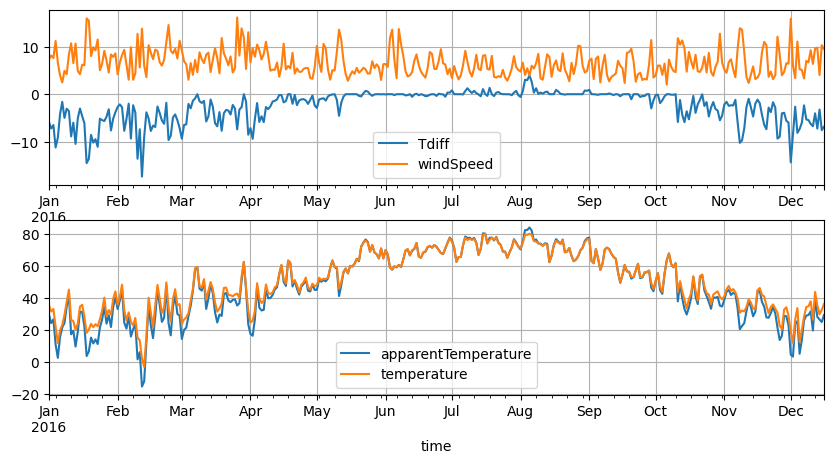

In [23]:
daily_mean_1 = data[['Tdiff','windSpeed']].resample('D').mean()
daily_mean_2 = data[['apparentTemperature', 'temperature']].resample('D').mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
daily_mean_1.plot(ax=axes[0], grid=True)
daily_mean_2.plot(ax=axes[1], grid=True)

In [24]:
data.drop('Tdiff', axis=1, inplace=True)

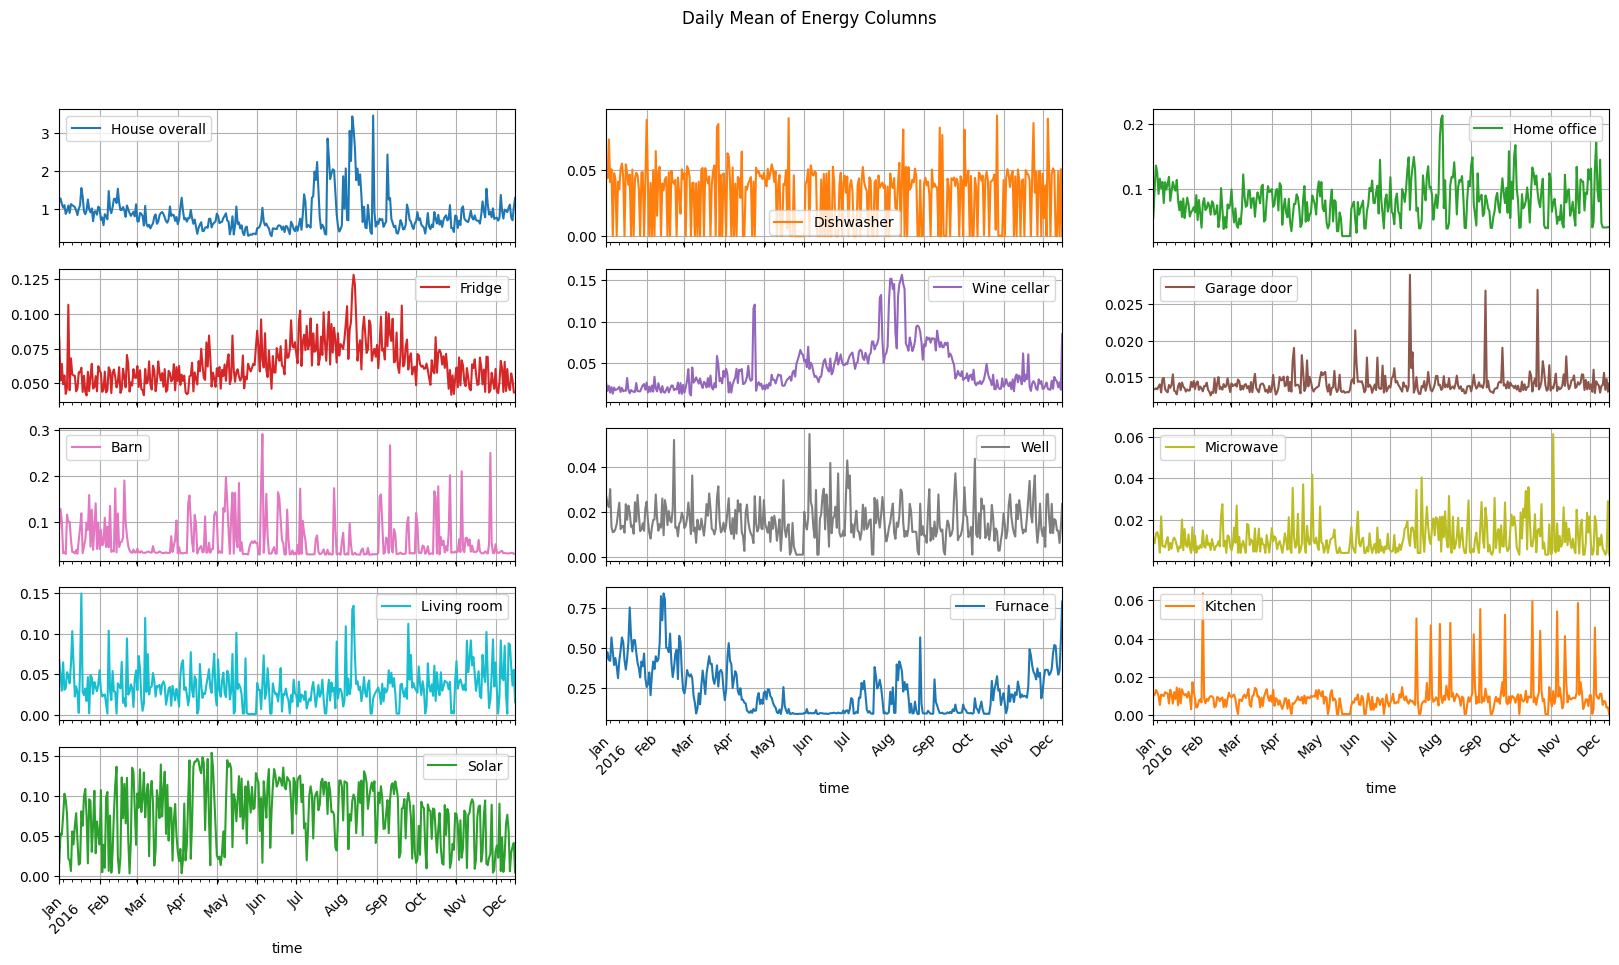

In [25]:
daily_mean_data = data[data.columns[0:13]].resample('D').mean()

axes = daily_mean_data.plot(subplots=True, layout=(-1, 3), figsize=(20, 10), grid=True, rot=45, xlabel=None, title="Daily Mean of Energy Columns")

From the above plots, we can see furnance energy consumption is high during winter around Dec - Feb and low in summer. Whereas, Fridge and Wine cellar energy consumption has higher during summer around Jun - Sep

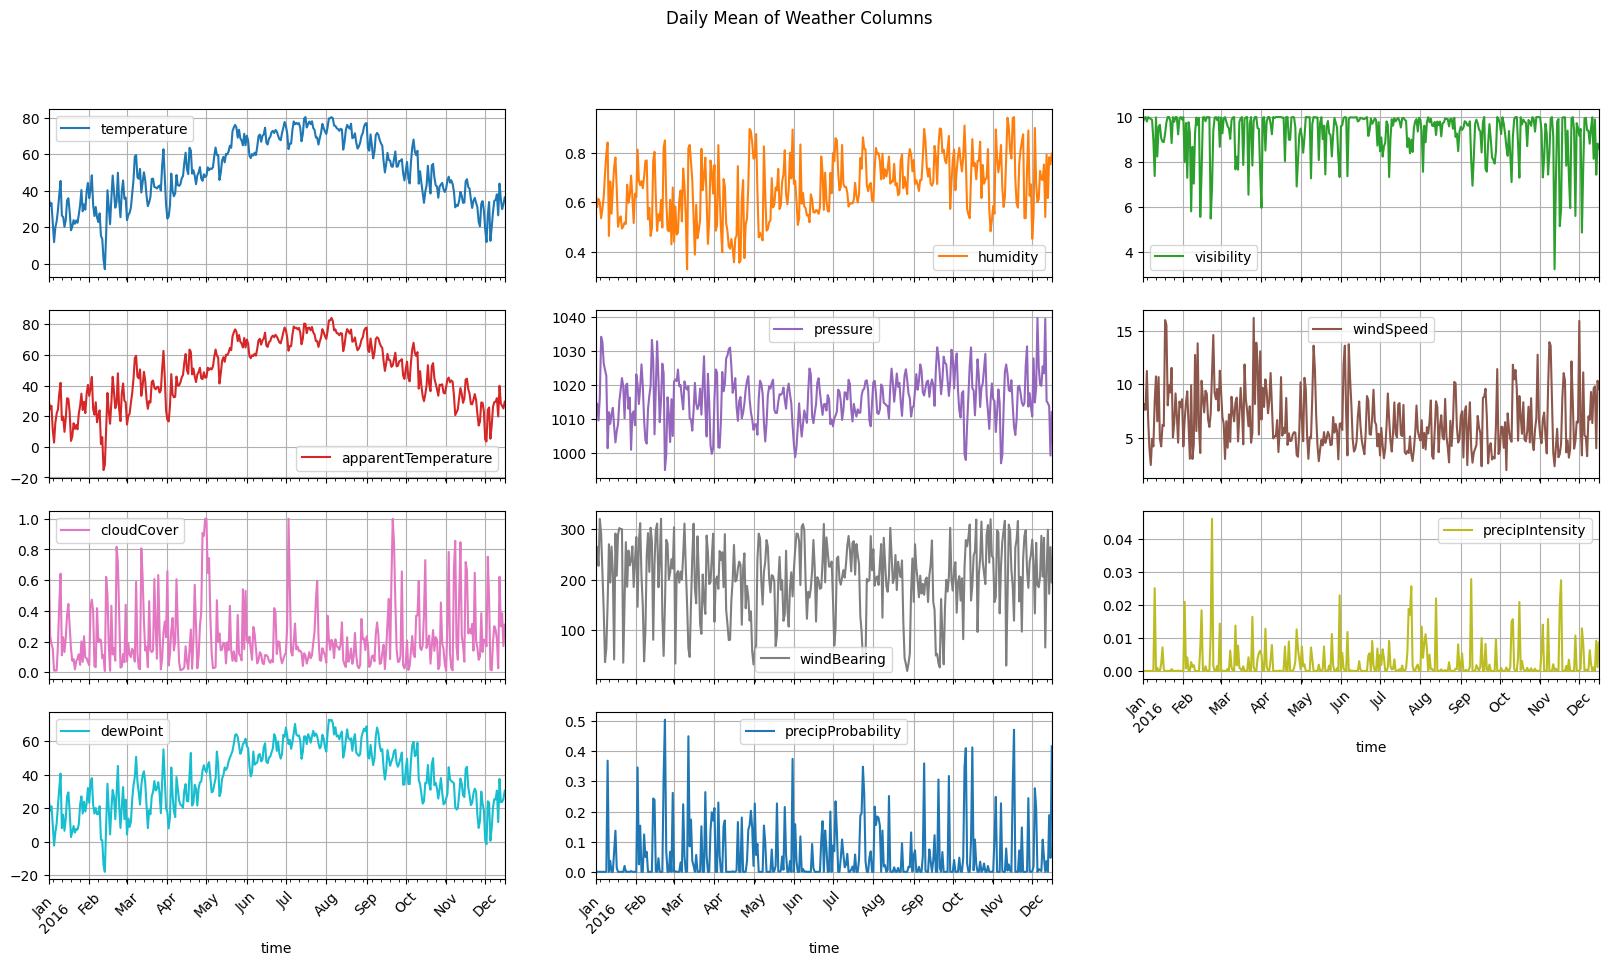

In [26]:
daily_mean_data_weather = data[data.columns[13:].tolist()].resample("D").mean()

axes = daily_mean_data_weather.plot(subplots=True, layout=(-1, 3), figsize=(20, 10), grid=True, rot=45, xlabel=None, title="Daily Mean of Weather Columns")

In [27]:
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.day_name()
data['hour'] = data.index.hour
data['minute'] = data.index.minute

In [28]:
data.head()

,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,0
2016-01-01 05:01:00,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,1
2016-01-01 05:02:00,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,2
2016-01-01 05:03:00,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.175417,0.000650,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,3
2016-01-01 05:04:00,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.300917,0.000783,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,4


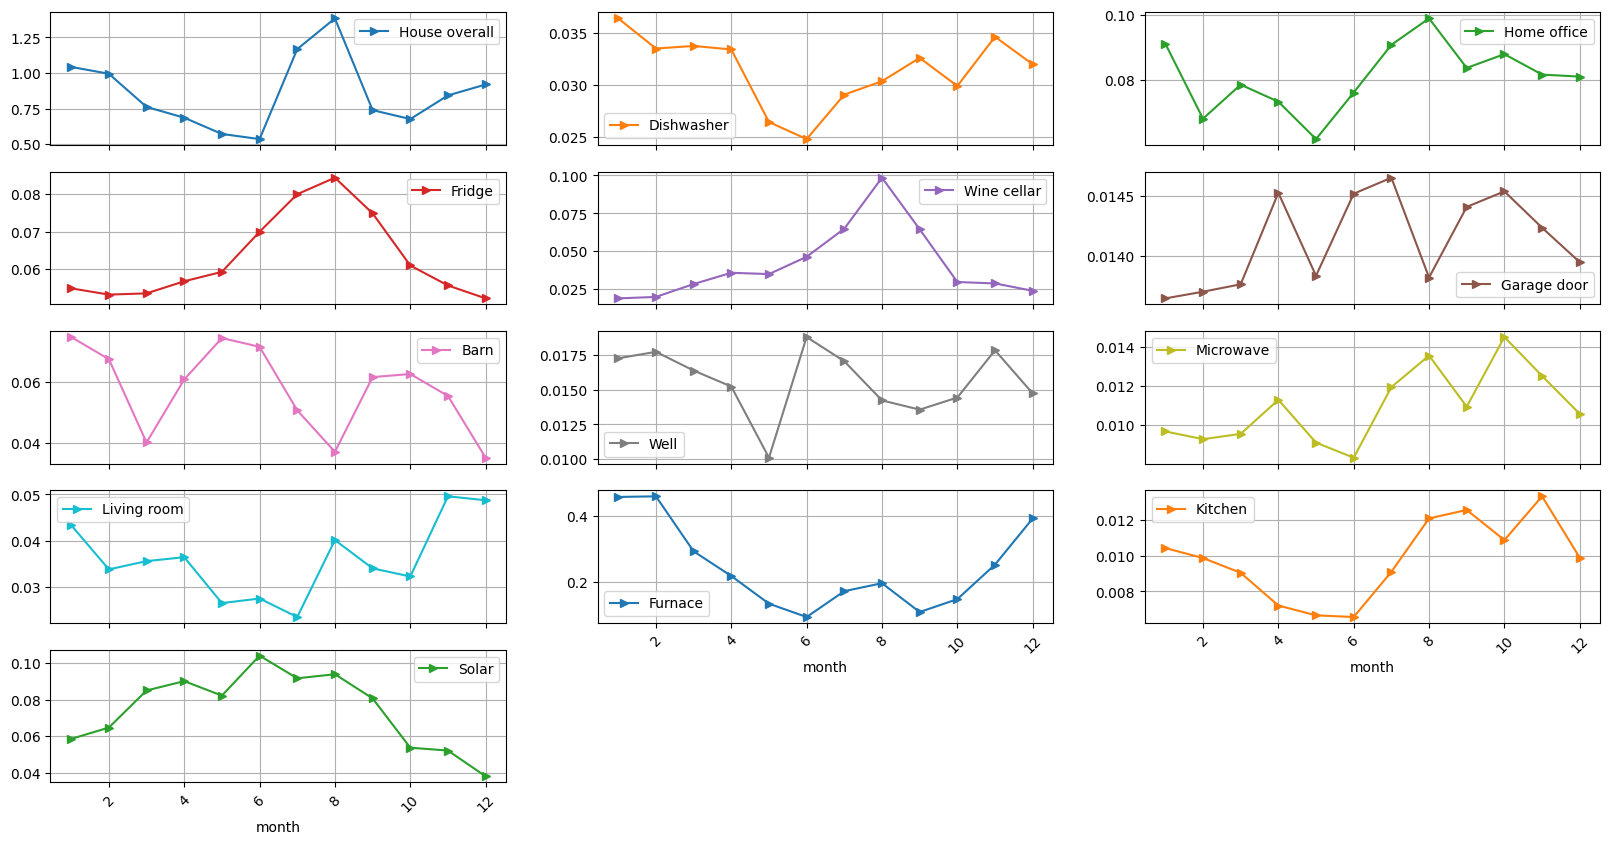

In [29]:
# Avg consumption per month
mean_month = data.groupby('month').agg({i:'mean' for i in data.columns[:-5].tolist()})
mean_month[mean_month.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(20, 10),
                                                       grid=True, rot=45, xlabel=None, marker='>');

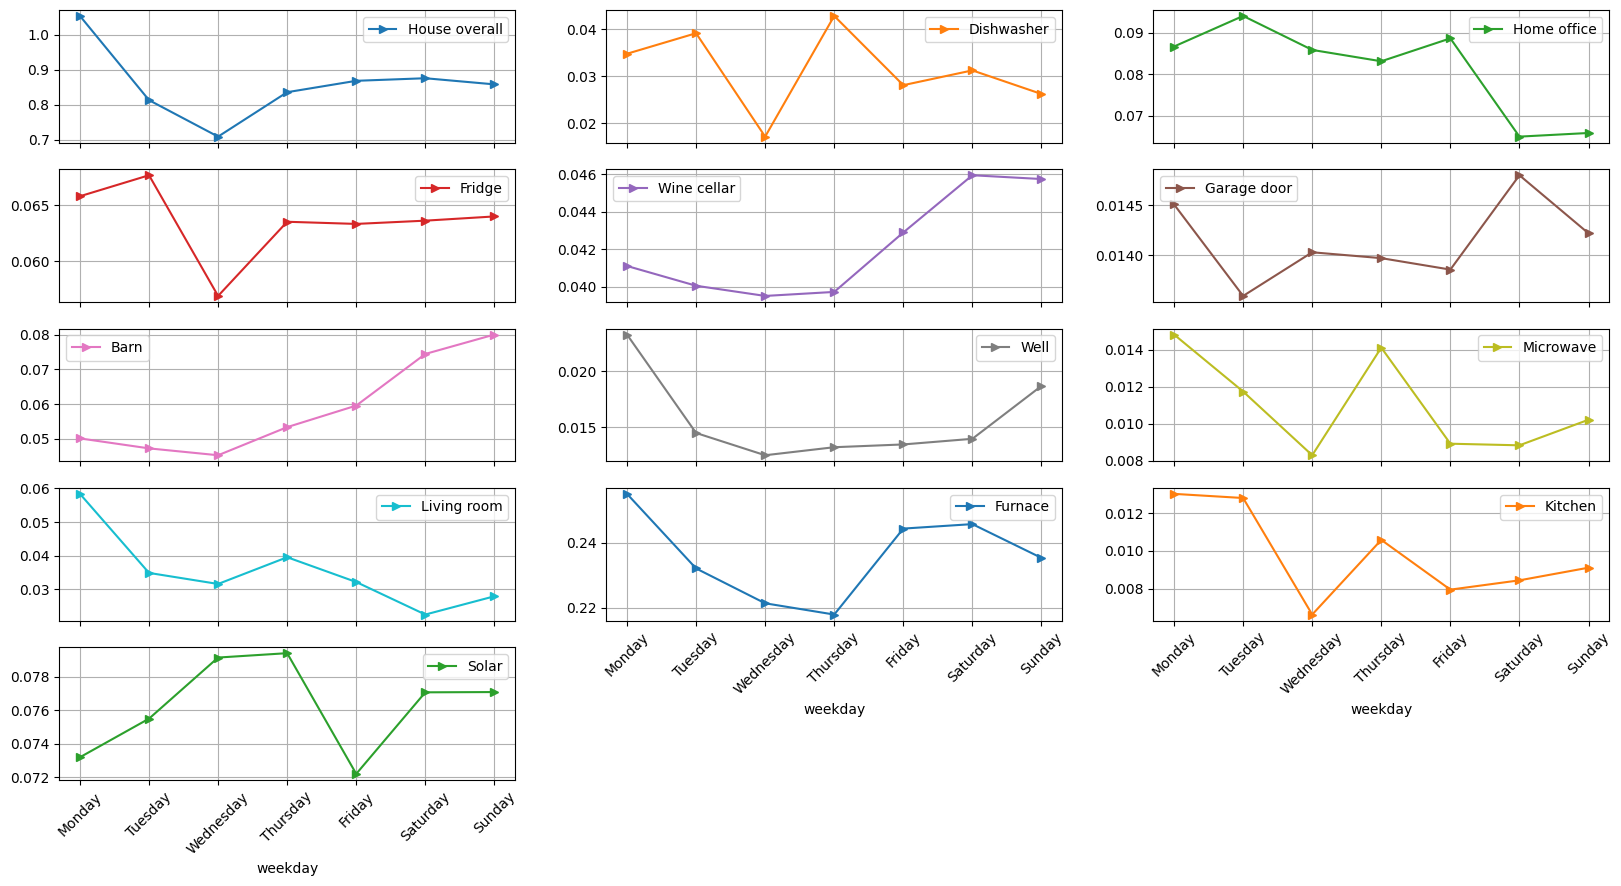

In [30]:
# Avg consumption per day
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

mean_weekday = data.groupby('weekday').agg({i:'mean' for i in data.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(20, 10),
                                                       grid=True, rot=45, xlabel=None, marker='>');

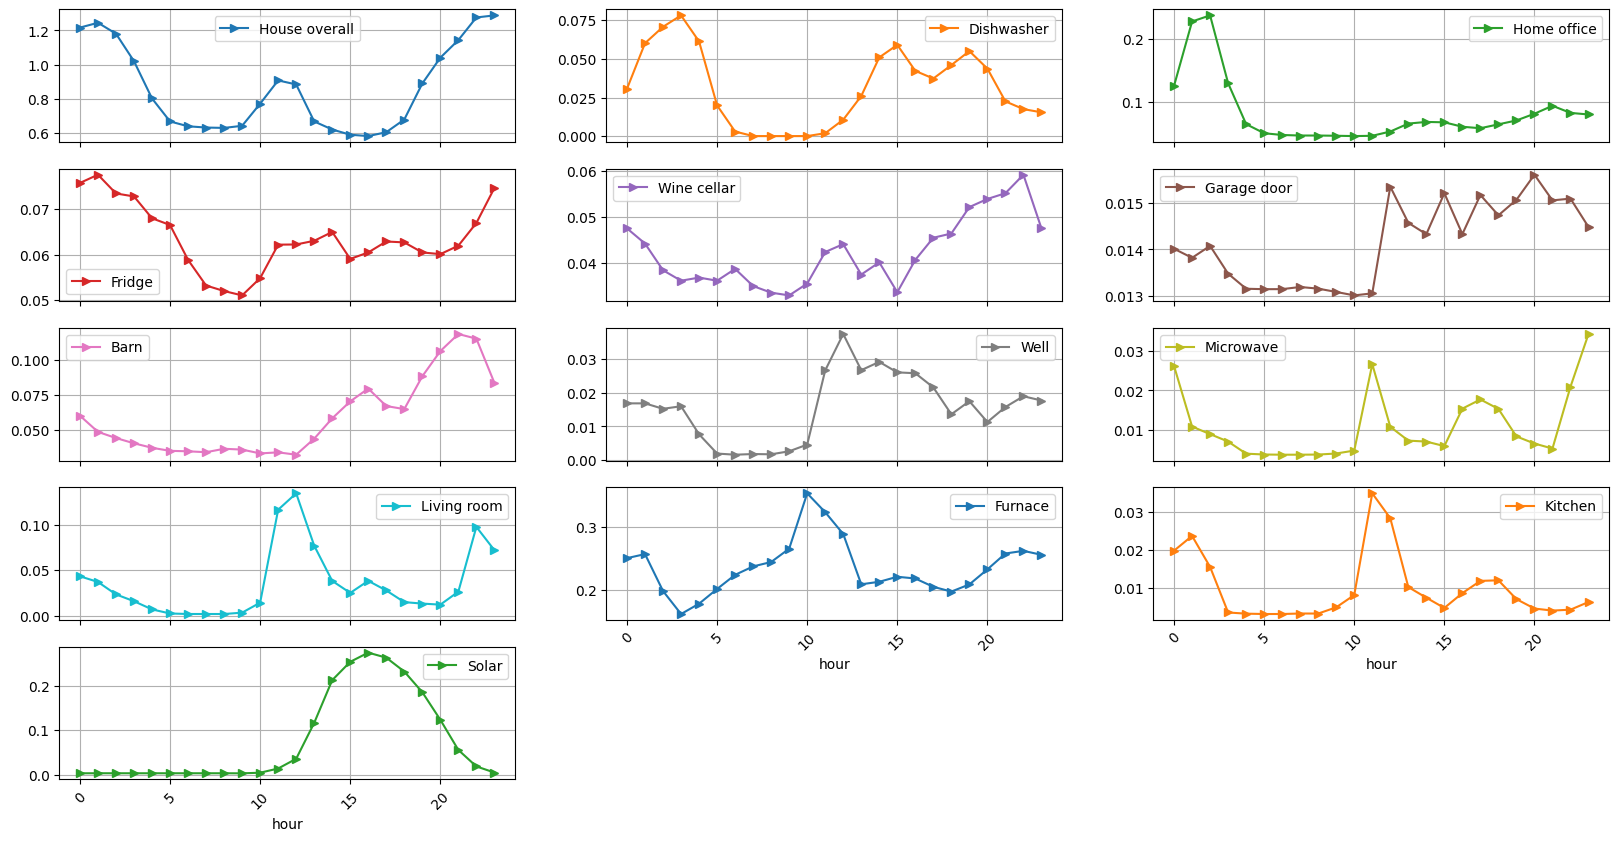

In [31]:
# Avg consumption per hour
mean_hour = data.groupby('hour').agg({i:'mean' for i in data.columns[:-5].tolist()})

mean_hour[mean_hour.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(20, 10),
                                                       grid=True, rot=45, xlabel=None, marker='>');

In [32]:
# Energy - Weather correlations
consumptions = data.columns[0:13].tolist()
weather = data.columns[13:-5].tolist()

lists = [consumptions]
for j in weather:
    correlations = [data[i].corr(data[j]) for i in consumptions]
    lists.append(correlations)

names = ['consumptions'] + [i + '_corr' for i in weather]

dataframe_corr = pd.DataFrame(np.column_stack(lists), columns=names).set_index('consumptions')

dataframe_corr = dataframe_corr.astype(float)

In [33]:
# Highlight correlations between energy and weather (red for corr > 0.1, orange for corr < -0.1)
dataframe_corr.style.applymap(lambda x: "background-color: red" if x > 0.1 else "background-color: orange" if x < -0.1 else "background-color: white")

,temperature_corr,humidity_corr,visibility_corr,apparentTemperature_corr,pressure_corr,windSpeed_corr,cloudCover_corr,windBearing_corr,precipIntensity_corr,dewPoint_corr,precipProbability_corr
consumptions,,,,,,,,,,,
House overall,0.010379,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033460,0.011183,0.024836,0.016040,-0.003317
Dishwasher,-0.015716,-0.001868,-0.008064,-0.014547,0.000211,-0.001672,-0.002395,0.004016,0.006265,-0.016099,0.008189
Home office,0.011908,-0.006008,0.020638,0.010856,0.027091,-0.017898,-0.039897,0.012427,-0.029890,0.007594,-0.032861
Fridge,0.107466,0.030749,0.009019,0.107064,-0.000517,-0.024886,-0.023490,-0.008589,0.014253,0.115169,0.004794
Wine cellar,0.289168,0.055541,0.030095,0.288882,0.018494,-0.052860,-0.040467,-0.025930,0.016588,0.298207,0.006571
Garage door,0.013511,-0.007399,0.002262,0.013578,-0.000276,0.000419,-0.007457,0.012327,-0.006941,0.008350,-0.006639
Barn,-0.017188,-0.002141,0.008376,-0.015189,0.011716,-0.015196,-0.011635,0.006255,-0.007258,-0.016738,-0.006063
Well,-0.004691,-0.006590,-0.001069,-0.004741,0.002994,0.000677,-0.003029,0.004085,-0.004377,-0.007346,-0.002788
Microwave,0.001369,0.012541,-0.018359,0.002265,-0.001248,-0.006129,0.009580,-0.006218,0.026936,0.006286,0.016222


In [34]:
data['Sum_usage'] = data[list(data.columns[1:12])].sum(axis=1)

In [35]:
data['Usage_diff'] = data['House overall'] - data['Sum_usage']

In [36]:
data.head(2)

,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute,Sum_usage,Usage_diff
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,0,0.708017,0.224817
2016-01-01 05:01:00,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,1,0.711500,0.222833


<Axes: xlabel='time'>

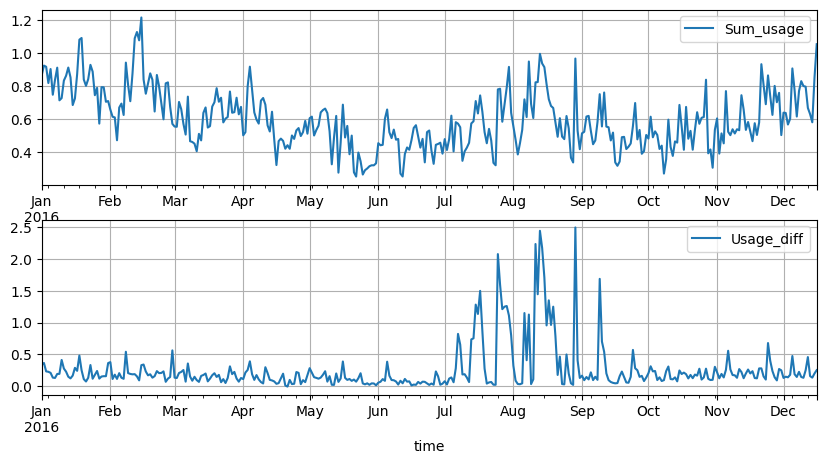

In [37]:
daily_mean_sum = data['Sum_usage'].resample('D').mean()
daily_mean_diff = data['Usage_diff'].resample('D').mean()

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
daily_mean_sum.plot(ax=axes[0], grid=True, legend=True)
daily_mean_diff.plot(ax=axes[1], grid=True, legend=True)

# ARIMA


## Stationarity check
**Augmented Dickey Fuller**:
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary. Also, to be stationary the critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

(None, None)

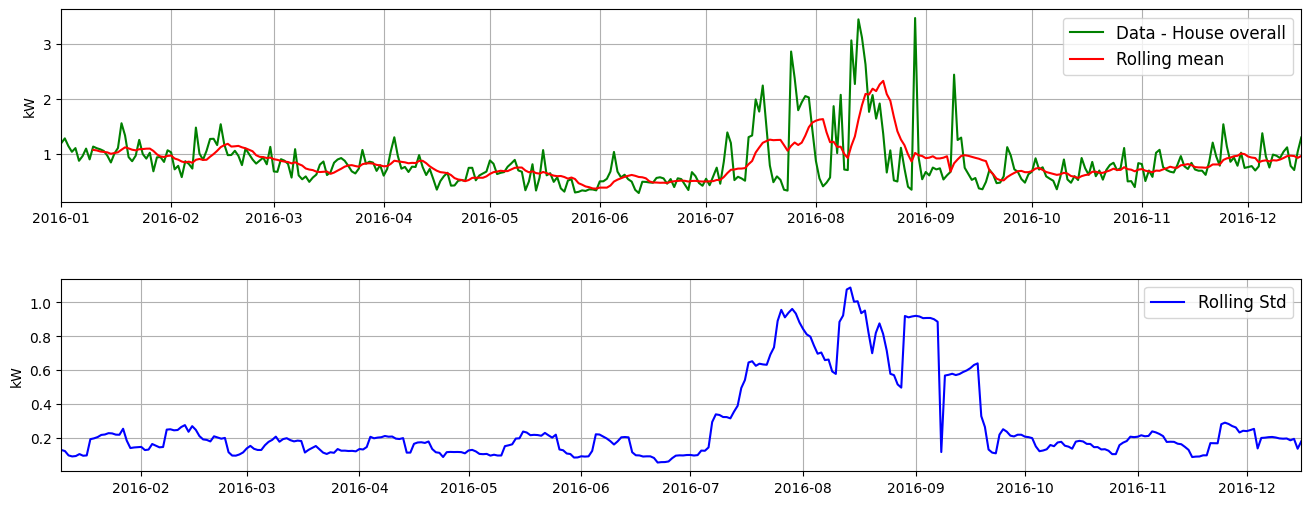

In [38]:
data_daily = data['House overall'].resample('d').mean()
rollingMEAN = data_daily.rolling(window=10).mean()
rollingSTD = data_daily.rolling(window=10).std()

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,6))
plt.subplots_adjust(hspace=0.4)
ax1.plot(data_daily, c='green',label='Data - House overall')
ax1.plot(rollingMEAN, c='red', label='Rolling mean')
ax2.plot(rollingSTD, c='blue',label = 'Rolling Std')

ax1.legend(fontsize=12), ax2.legend(fontsize=12)
ax1.set_ylabel('kW'), ax2.set_ylabel('kW')
ax1.margins(x=0), ax2.margins(x=0)
ax1.grid(), ax2.grid()

In [39]:
from statsmodels.tsa.stattools import adfuller

resultDFtest = adfuller(data_daily, autolag='AIC')
Out = pd.Series(resultDFtest[0:4], index=['Test Statistic','p-value','#Lags Used','#Observations Used'])
for key1, value1 in resultDFtest[4].items():
    Out['Critical Value (%s)'%key1] = value1

print('ADF RESULTS: \n\n{}'.format(Out))

ADF RESULTS: 

Test Statistic           -2.988003
p-value                   0.036030
#Lags Used               10.000000
#Observations Used      340.000000
Critical Value (1%)      -3.449730
Critical Value (5%)      -2.870079
Critical Value (10%)     -2.571319
dtype: float64


## ACF e PACF


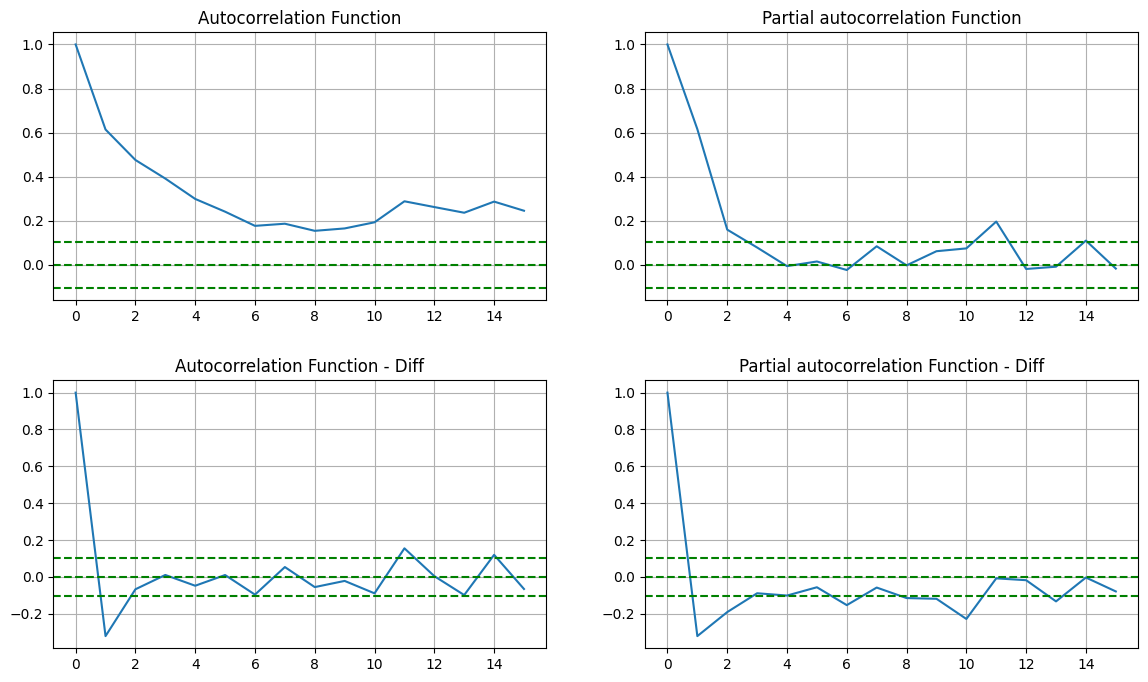

In [40]:
data_daily_diff = data_daily-data_daily.shift(1)
data_daily_diff = data_daily_diff.dropna()

# Autocorrelation function and partial Autocorrelation function plots
from statsmodels.graphics.tsaplots import acf, pacf
ACF = acf(data_daily, nlags=15)
PACF = pacf(data_daily, nlags=15, method='ols')
ACF1 = acf(data_daily_diff, nlags=15)
PACF1 = pacf(data_daily_diff, nlags=15, method='ols')

def plots_corr(ax,func,dat,title):
    ax.plot(func)
    ax.axhline(y=0, linestyle='--',c='green')
    ax.axhline(y=-1.96/np.sqrt(len(dat)),linestyle='--',c='green')
    ax.axhline(y=1.96/np.sqrt(len(dat)),linestyle='--',c='green')
    ax.grid()
    ax.set_title(title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14,8))
plt.subplots_adjust(hspace=0.3)
plots_corr(ax1, ACF, data_daily,'Autocorrelation Function')
plots_corr(ax2, PACF, data_daily,'Partial autocorrelation Function')
plots_corr(ax3, ACF1, data_daily_diff,'Autocorrelation Function - Diff')
plots_corr(ax4, PACF1, data_daily_diff,'Partial autocorrelation Function - Diff')

In [41]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
print('# points in series:', len(data_daily))
print('# points in train:', len(train))
print('# points in test:', len(test))

# points in series: 351
# points in train: 245
# points in test: 106


In [42]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,1,1))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

Akaike information criterion:  258.46236943719873


                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  245
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -125.231
Date:                Fri, 31 May 2024   AIC                            258.462
Time:                        11:37:22   BIC                            272.451
Sample:                    01-01-2016   HQIC                           264.096
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4590      0.051      9.051      0.000       0.360       0.558
ar.L2          0.0999      0.037      2.667      0.008       0.026       0.173
ma.L1         -0.9438      0.026    -35.670      0.0

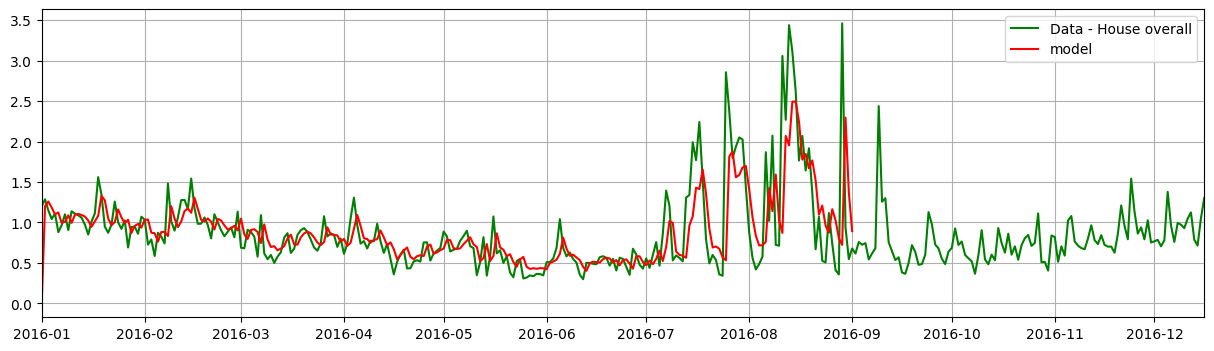

In [43]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='green',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())

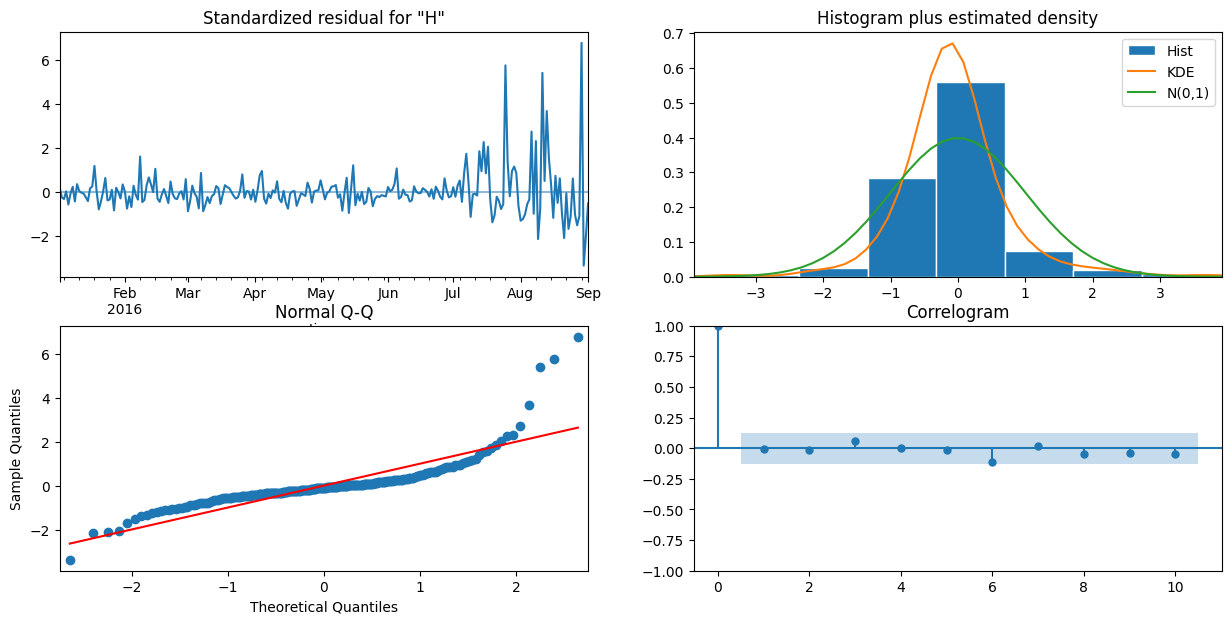

In [44]:
model_fit.plot_diagnostics(figsize=(15,7))
plt.show()

## Single Forecast

MSE: 0.259
RMSE: 0.509
MAE: 0.463
MAPE: 0.722
MASE: 1.886
R^2 score: -2.379


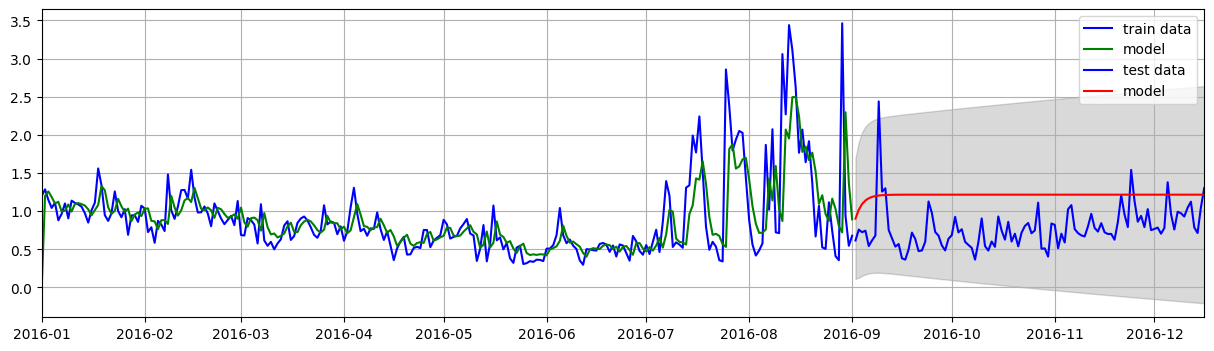

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

new_fit = model_fit.append(data_daily[size:size+1], refit=False)
forecast = model_fit.forecast(len(test))
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)
plt.figure(figsize=(15,4))
plt.plot(train, c='blue',label='train data')
plt.plot(model_fit.predict(dynamic=False), c='green', label='model')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);

# calculate errors
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))

## Rolling Forecast (Time series cross validation)

In [46]:
n = 1
X = data_daily.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
predictions = list()
confidence = list()
history = [x for x in train]

# walk-forward validation
for t in range(0,len(test),n):
    model = ARIMA(history, order=(2,0,1))
    model_fit = model.fit()
    output = model_fit.forecast(n).tolist()
    conf = model_fit.get_forecast(n).conf_int(0.05)
    predictions.extend(output)
    confidence.extend(conf)
    obs = test.tolist()[t:t+n]
    history = history[n:]
    history.extend(obs);
conf_int =  np.vstack(confidence)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Test

MSE: 0.06930
RMSE: 0.263
MAE: 0.174
MAPE: 0.226
MASE: 0.710
R^2 score: 0.095


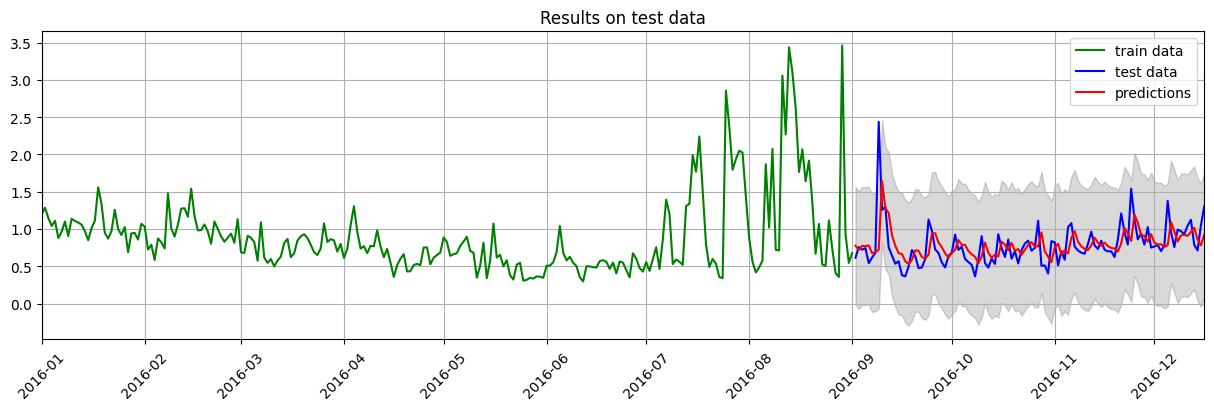

In [47]:
# Forecasts against actual outcomes
m = len(predictions) - len(test)
index_extended = data_daily[size:].index.union(data_daily[size:].index.shift((m))[-(m):])
predictions_series = pd.Series(predictions, index=index_extended)
confidence = pd.DataFrame(conf_int, columns=['lower', 'upper'])
plt.figure(figsize=(15,4))
plt.plot(data_daily[:size], c='green',label='train data')
plt.plot(data_daily[size:], c='blue',label='test data')
plt.plot(predictions_series, c='red', label='predictions')
plt.fill_between(predictions_series.index, confidence['lower'],
                 confidence['upper'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0)
plt.title('Results on test data'), plt.xticks(rotation=45)

# Evaluate forecasts
print('MSE: %.5f' % (mean_squared_error(test, predictions[:len(test)])))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, predictions[:len(test)])))
MAE = mean_absolute_error(test, predictions[:len(test)])
MAPE = np.mean(np.abs(predictions[:len(test)] - test)/np.abs(test))
MASE = np.mean(np.abs(test - predictions[:len(test)]))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, predictions[:len(test)]))

In [48]:
pred_df = pd.DataFrame(predictions_series[predictions_series.index > '2016-09-01'],columns=['forecast'])
pred_df['actuals'] = data_daily[size:]

pred_df.head()

,forecast,actuals
time,,
2016-09-02,0.777727,0.615530
2016-09-03,0.717587,0.757602
2016-09-04,0.773637,0.723917
2016-09-05,0.769632,0.743956
2016-09-06,0.779745,0.541591


# SARIMAX with exogs
Trying SARIMAX with some external variables tham might bring seasonality

In [49]:
data_exog = pd.get_dummies(data, columns = ['month','weekday'] , prefix = ['month','weekday'])

In [50]:
ext_var_list = ['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6','month_7', 'month_8', 'month_9',
                'month_10', 'month_11', 'month_12','weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
                'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday','weekday_Wednesday']

exog_part = data_exog[ext_var_list]
exog_part = exog_part.resample('d').mean()

## Train

In [51]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]

model = sm.tsa.statespace.SARIMAX(endog=train, exog=exog_part[:size], order=(2,1,1), seasonal_order=(5,0,1,12))
model_fit = model.fit()
print('Akaike information criterion: ', model_fit.aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Akaike information criterion:  257.17125424435596


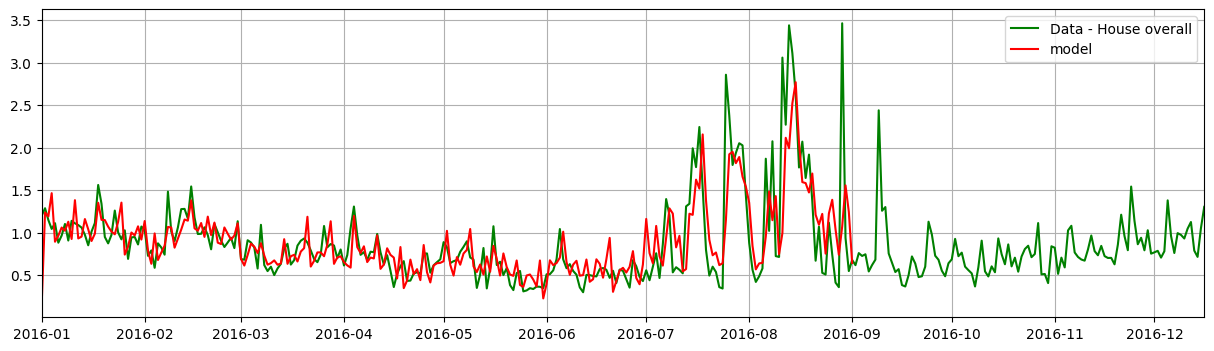

In [52]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='green',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);

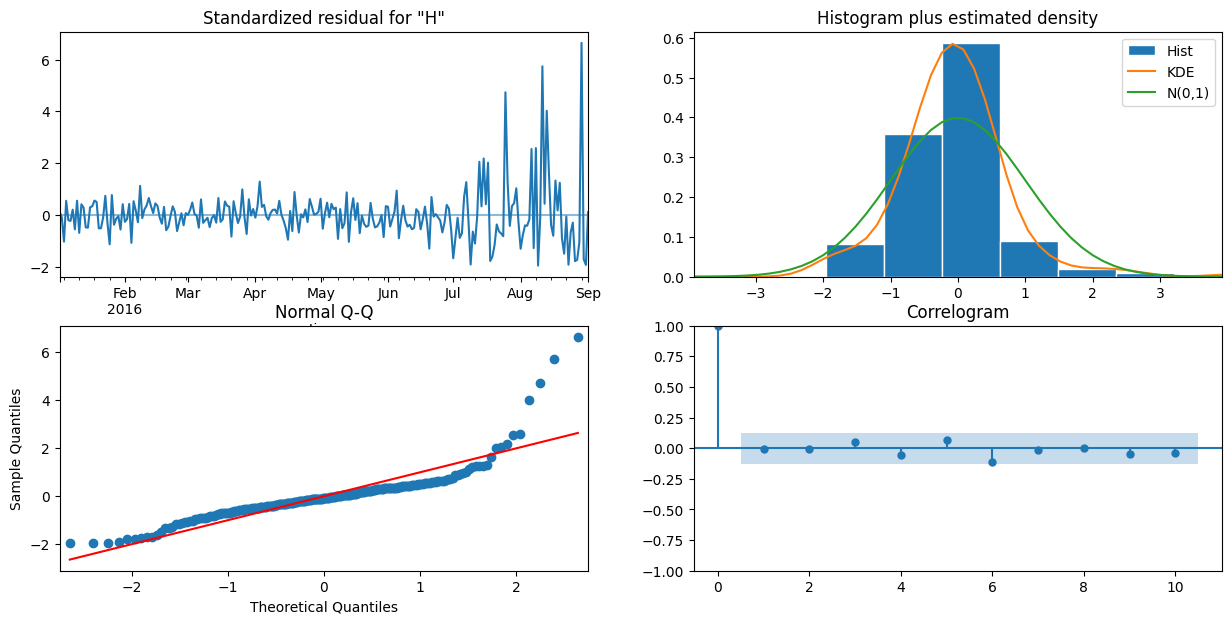

In [53]:
model_fit.plot_diagnostics(figsize=(15,7))
plt.show()

## Test

MSE: 0.102
RMSE: 0.319
MAE: 0.245
MAPE: 0.366
MASE: 0.996
R^2 score: -0.333


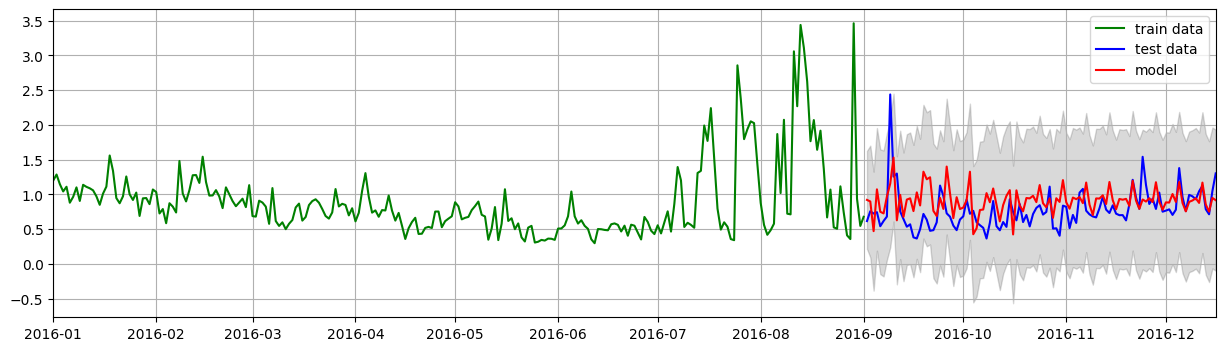

In [54]:
forecast = model_fit.forecast(len(test), exog = exog_part[size:])
confidence = model_fit.get_forecast(len(test), exog = exog_part[size:]).conf_int(0.05)
plt.figure(figsize=(15,4))
plt.plot(train, c='green',label='train data')
plt.plot(test, c='blue',label='test data')
plt.plot(forecast, c='red', label='model')
plt.fill_between(confidence.index,confidence['lower House overall'],
                 confidence['upper House overall'], color='k', alpha=.15)
plt.legend()
plt.grid(), plt.margins(x=0);

# calculate errors
print('MSE: %.3f' % (mean_squared_error(test, forecast)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, forecast)))
MAE = mean_absolute_error(test, forecast)
MAPE = np.mean(np.abs(forecast - test)/np.abs(test))
MASE = np.mean(np.abs(test - forecast))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, forecast))

From MAPE's of above two models, ARIMA using rolling forecast having less deviation compared to SARIMAX